In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__ 

'2.8.0'

In [3]:
#1.資料預處理Cifar CNN

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
y_train_label=y_train_label.reshape(-1)
y_test_label=y_test_label.reshape(-1)

In [7]:
x_train_normalize = x_train_image.astype('float32') / 255.0
x_test_normalize = x_test_image.astype('float32') / 255.0

In [8]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_label)
y_test_onehot = utils.to_categorical(y_test_label)

In [9]:
print("train data:",'images:',x_train_normalize.shape," labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ," labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


In [10]:
class_names =["airplane","automobile","bird","cat","deer",
       "dog","frog","horse","ship","truck"]

In [11]:
#2.建立模型Cifar CNN Functional API

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras import Input
from tensorflow.keras import Model

In [13]:
inputs = Input(shape=(32, 32, 3), name='input_layer')

x = Conv2D(
    filters=32,kernel_size=(3,3),input_shape=(32, 32,3), 
    activation='relu',padding='same')(inputs)

x = MaxPooling2D(pool_size=(2, 2))(x)

x=Conv2D(
    filters=64, kernel_size=(3, 3), 
    activation='relu', padding='same')(x)

x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)

In [14]:
model =Model(inputs,outputs,name='CifarCNNFunc')

In [15]:
print(model.summary())

Model: "CifarCNNFunc"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)             

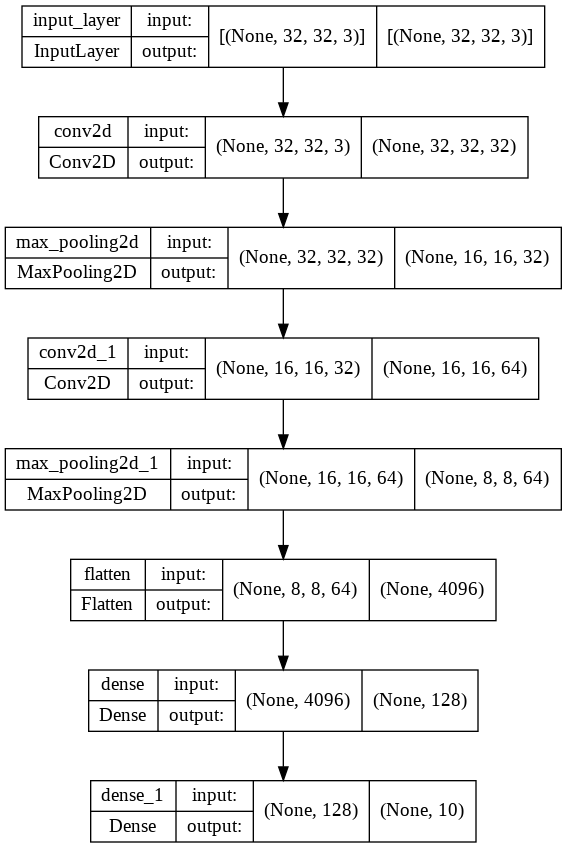

In [16]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [17]:
#3.訓練模型

In [18]:
model.compile(metrics=['acc'],optimizer='adam',loss='categorical_crossentropy')

In [19]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,validation_split=0.2,
    batch_size=200,epochs=10,verbose=2)

Epoch 1/10
200/200 - 14s - loss: 1.6474 - acc: 0.4115 - val_loss: 1.3854 - val_acc: 0.5055 - 14s/epoch - 68ms/step
Epoch 2/10
200/200 - 1s - loss: 1.2775 - acc: 0.5487 - val_loss: 1.2270 - val_acc: 0.5672 - 1s/epoch - 7ms/step
Epoch 3/10
200/200 - 2s - loss: 1.1271 - acc: 0.6044 - val_loss: 1.0856 - val_acc: 0.6265 - 2s/epoch - 8ms/step
Epoch 4/10
200/200 - 2s - loss: 1.0230 - acc: 0.6442 - val_loss: 1.0318 - val_acc: 0.6464 - 2s/epoch - 8ms/step
Epoch 5/10
200/200 - 1s - loss: 0.9529 - acc: 0.6694 - val_loss: 1.0092 - val_acc: 0.6558 - 1s/epoch - 7ms/step
Epoch 6/10
200/200 - 1s - loss: 0.8883 - acc: 0.6920 - val_loss: 0.9654 - val_acc: 0.6697 - 1s/epoch - 7ms/step
Epoch 7/10
200/200 - 1s - loss: 0.8473 - acc: 0.7061 - val_loss: 0.9228 - val_acc: 0.6837 - 1s/epoch - 7ms/step
Epoch 8/10
200/200 - 2s - loss: 0.7994 - acc: 0.7241 - val_loss: 0.9407 - val_acc: 0.6826 - 2s/epoch - 8ms/step
Epoch 9/10
200/200 - 1s - loss: 0.7623 - acc: 0.7373 - val_loss: 0.8907 - val_acc: 0.7001 - 1s/epoch 

In [20]:
#4.判斷模型的訓練結果

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

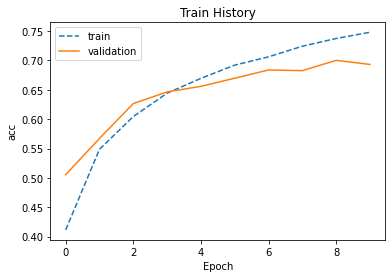

In [22]:
show_train_history(train_history,'acc','val_acc')

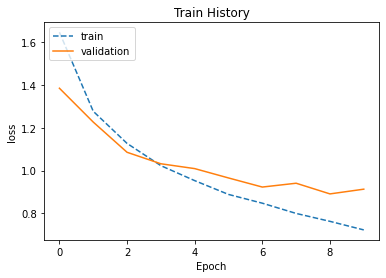

In [23]:
show_train_history(train_history,'loss','val_loss') 

In [24]:
#5.測試模型

In [25]:
scores = model.evaluate(x_test_normalize, y_test_onehot)

313/313 [==============================] - 1s 4ms/step - loss: 0.9094 - acc: 0.6918


In [26]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 0.9093721508979797 test_acc= 0.6917999982833862


In [27]:
#6.進行預測

In [28]:
probability = model.predict(x_test_normalize)

In [29]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [30]:
prediction

array([3, 1, 0, ..., 5, 1, 7])

In [31]:
import matplotlib.pyplot as plt 

In [32]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [33]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

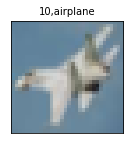

In [34]:
plot_images_labels_prediction(x_test_image,y_test_label,[],idx=10,num=1)

In [35]:
def show_predicted_probability(
    images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary') 
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))     

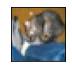

label: cat
predict: cat
airplane   Probability:0.002211127
automobile Probability:0.000044961
bird       Probability:0.005223418
cat        Probability:0.731327951
deer       Probability:0.004452860
dog        Probability:0.234867394
frog       Probability:0.001951980
horse      Probability:0.001029372
ship       Probability:0.018866839
truck      Probability:0.000024099


In [36]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,0) 

In [37]:
#顯示Cifar-10 heatmap_confusion_matrix

In [38]:
class_names =["airplane","automobile","bird","cat","deer",
       "dog","frog","horse","ship","truck"]
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def plot_heatmap_confusion_matrix(cm_np):
  cm_norm = np.around(
      cm_np.astype('float') / 
      cm_np.sum(axis=1)[:, np.newaxis],decimals=3)
  cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)
  figure = plt.figure(figsize=(8, 6))
  plt.tight_layout();sns.set(font_scale=1)
  plt.ylabel('Label');plt.xlabel('Predicted')
  sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
  return figure

In [39]:
import pandas as pd

In [40]:
cm=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

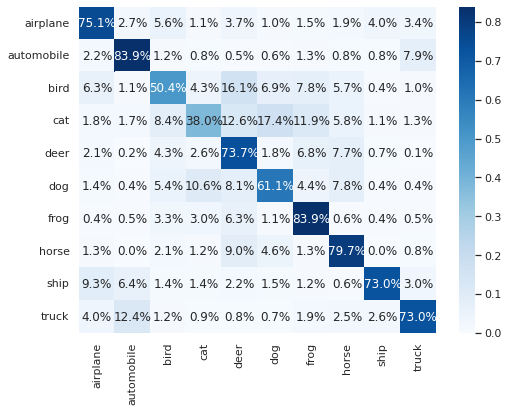

In [41]:
figure = plot_heatmap_confusion_matrix(cm.to_numpy())

In [42]:
#7. 儲存模型至gdriver

In [43]:
MODEL_NAME='CifarCNN/'

In [44]:
def has_config(model):
  try:
    model.get_config()
    return True
  except:
    return False

In [45]:
has_config(model)

True

In [46]:
import os
def save_model_to_gdrive(model_dir,model_name): 
  path= model_dir+model_name
  if not os.path.exists(model_dir):os.makedirs(model_dir) 
  if not os.path.exists(path):os.makedirs(path) 
  if has_config(model):  
    model_json = model.to_json()  
    with open(path+"structure.json","w") as json_file:
      json_file.write(model_json)
    model.save(path+"whole.h5",save_format='h5')
  model.save(path+"SavedModel",save_format='tf')  
  model.save_weights(path+"weight.h5")   
  from google.colab import drive 
  drive.mount('/content/drive') 
  os.system("cp -r Model '/content/drive/My Drive'")   

In [47]:
save_model_to_gdrive(model_dir='Model/',model_name=MODEL_NAME)

INFO:tensorflow:Assets written to: Model/CifarCNN/SavedModel/assets
Mounted at /content/drive


In [48]:
ls -l '/content/drive/My Drive/Model/'

total 16038
-rw------- 1 root root 16410384 Mar 12 05:57 Cifar_C5P1_ErAuBn.h5
drwx------ 3 root root     4096 May 30 04:05 CifarCNN/
drwx------ 2 root root     4096 Feb  2 14:35 CifarCNNFunc/
drwx------ 2 root root     4096 Mar 20 08:54 CifarCNNSub/


In [49]:
ls -l Model/$MODEL_NAME

total 8596
drwxr-xr-x 4 root root    4096 May 30 04:04 SavedModel/
-rw-r--r-- 1 root root    3415 May 30 04:04 structure.json
-rw-r--r-- 1 root root 2202904 May 30 04:04 weight.h5
-rw-r--r-- 1 root root 6588096 May 30 04:04 whole.h5
